# Experiments recreating “Schotter” by Georg Nees

In support of a couple of blog posts:
* [schotter-1](https://zellyn.com/2024/06/schotter-1/)
* [schotter-2](https://zellyn.com/2024/06/schotter-2/)

In [153]:
from dataclasses import dataclass
import math
import random
import types

import drawsvg as draw

### Set up a drawing and group (for styling) to add paths to.

We set the style and attributes to match the [photograph](https://collections.vam.ac.uk/item/O221321/schotter-print-nees-georg/) from the Victoria and Albert museum as closely as possible.


In [154]:
d = draw.Drawing(180, 280, origin='center', style="background-color:#eae6e2")
g = draw.Group(stroke='#41403a', stroke_width='0.4', fill='none', stroke_linecap="round", stroke_linejoin="round")
p = None

## Helper methods

By implementing helper methods, we get to keep the main code as similar as possible.

* the random generators (`J1` and `J2`) were converted to functions
* the `x` and `y` parameters were reversed to mimic the typical orientation

In [190]:
MOD = 1 << 30

In [156]:
class Random:
    def __init__(self, seed):
        self.JI = seed

    def next(self, JA, JE):
        self.JI = (self.JI * 5) % MOD
        return self.JI / MOD * (JE-JA) + JA

In [157]:
# Common seeds from book
JS1 = 1306859721
JS2 = 1485627309
JS3 = 1649173265
JS4 = 1805297143
JS5 = 1973195467
JS6 = 2013911545

# From famous version of “Schotter”
JS7 = 1922110153
JS8 = 1769133315

In [158]:
# “empty” means “leer” in German. This is `MoveTo`
X = Y = 0
def LEER(x,y):
    global p
    if p is not None:
        g.append(p)
    p = draw.Path()
    p.M(y,x)
    X = x
    Y = y

def LINE(x,y):
    p.L(y,x)
    x = X
    y = Y

def CLOSE():
    if p is not None:
        g.append(p)
        d.append(g)

r1 = Random(JS5)
r2 = Random(JS3)

JE1 = JA1 = JE2 = JA2 = 0
def J1():
    return r1.next(JA1, JE1)
def J2():
    return r2.next(JA2, JE2)

def SIN(x):
    return math.sin(x)
def COS(x):
    return math.cos(x)

## Converted code

The is pretty close to a direct transliteration into Python.
* Variable declarations are unnecessary
* loops are more concise

In [159]:
R = 5 * 1.4142
HALFPI = 3.14159 * 0.5
PI4T = HALFPI * 0.5
I = 0
P = Q = PSI = 0.0

def QUAD():
  global I, JE1, JA1, JE2, JA2

  JE1 = 5*I/264
  JA1 = -JE1
  JE2 = PI4T * (1+I/264)
  JA2 = PI4T * (1-I/264)
  P1 = P+5+J1()
  Q1 = Q+5+J1()
  PSI = J2()

  LEER(P1+R*COS(PSI), Q1+R*SIN(PSI))
  for S in (1,2,3,4):
    PSI = PSI+HALFPI
    LINE (P1+R*COS(PSI), Q1+R*SIN(PSI))
  I += 1

def SERIE(QUER, HOCH, XMAL, YMAL, FIGUR):
  global P, Q

  P = -QUER * XMAL * 0.5
  Q = YANF = -HOCH * YMAL * 0.5

  for COUNTX in range(1, XMAL+1):
    Q = YANF
    for COUNTY in range(1, YMAL+1):
      FIGUR()
      Q = Q + HOCH
    P = P + QUER
  LEER(-148.0, -105.0)
  CLOSE()

In [160]:
SERIE(10.0, 10.0, 22, 12, QUAD)
# /SCHOTTER

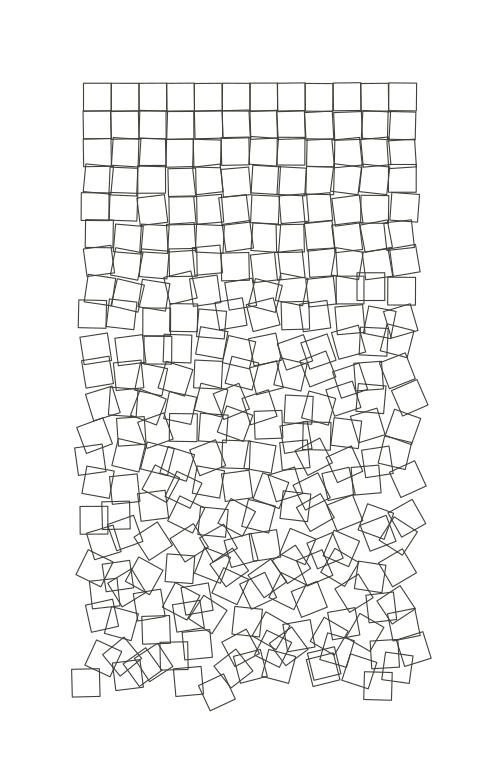

In [161]:
d.set_render_size(w=500)

## More idiomatic Python version

In [162]:
def draw_square(g, x, y, i, r1, r2):
    r = 5 * 1.4142
    pi = 3.14159
    move_limit = 5 * i / 264
    twist_limit = pi/4 * i / 264

    y_center = y + 5 + r1.next(-move_limit, move_limit)
    x_center = x + 5 + r1.next(-move_limit, move_limit)
    angle = r2.next(pi/4 - twist_limit, pi/4 + twist_limit)

    p = draw.Path()
    p.M(x_center + r * math.sin(angle), y_center + r * math.cos(angle))
    for step in range(4):
        angle += pi / 2
        p.L(x_center + r * math.sin(angle), y_center + r * math.cos(angle))
    g.append(p)

def draw_plot(x_size, y_size, x_count, y_count, s1, s2):
    r1 = Random(s1)
    r2 = Random(s2)
    d = draw.Drawing(180, 280, origin='center', style="background-color:#eae6e2")
    g = draw.Group(stroke='#41403a', stroke_width='0.4', fill='none',
                   stroke_linecap="round", stroke_linejoin="round")

    y = -y_size * y_count * 0.5
    x0 = -x_size * x_count * 0.5
    i = 0

    for _ in range(y_count):
        x = x0
        for _ in range(x_count):
            draw_square(g, x, y, i, r1, r2)
            x += x_size
            i += 1
        y += y_size
    d.append(g)
    return d

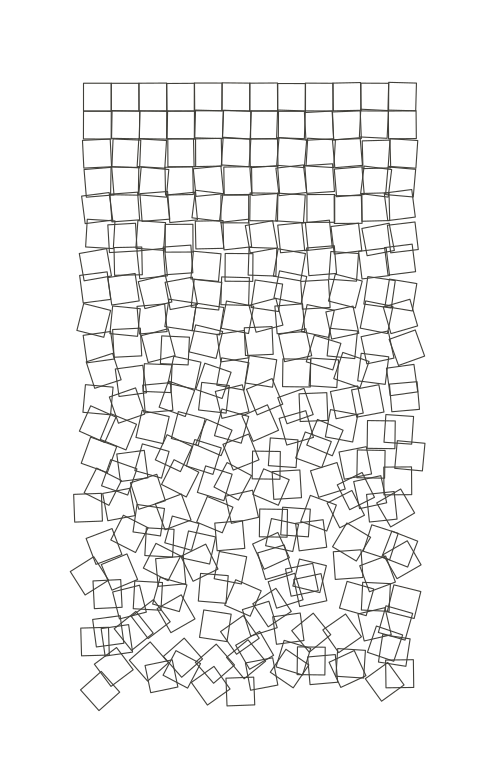

In [163]:
# Book plot seeds
#  Shift: 1973195467 (JS5)
#  Twist: 1649173265 (JS3)
# Art Plot seeds
#  Shift: 1922110153
#  Twist: 1769133315

# draw_plot(10.0, 10.0, 12, 22, 1973195467, 1649173265).set_render_size(w=500)
draw_plot(10.0, 10.0, 12, 22, 1922110153, 1769133315).set_render_size(w=500)